In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/Sand_Elevationn/Sand_Elevationn")

In [3]:
os.getcwd()

'/content/drive/MyDrive/Sand_Elevationn/Sand_Elevationn'

In [4]:
import os
import shutil

D = os.getcwd()

os.chdir(D+'/Raw Images/')

L = os.listdir()

for x in L:
	shutil.copy(os.getcwd()+'/'+x, D+'/getContour/Operation/'+x)

In [5]:
os.chdir(D)
print('Running Conturing')

from PIL import Image, ImageOps
import numpy
import os

def getContour(IMAGE):
	if IMAGE == 'Result':return  

	og_image = Image.open('./'+IMAGE) # opening image in RGB
	gray_image = ImageOps.grayscale(og_image) # opening image in Grayscale

	arr = numpy.array(gray_image) # converting gray scaled image into a numpy array
	arr2 = numpy.array(og_image) # converting RGB image into numpy array

	Thresholds = [66, 120] # thresholds specification
  

	for i in range(arr.shape[0]):
		#if i%100 == 0 : print(".", end='')

		for j in range(arr.shape[1]):

			if arr[i][j]<=Thresholds[0]:  # if pixel value in 2D gray image array is less then 66
				arr2[i][j][0]=arr2[i][j][1]=0 # turn the pixel in RGB image as Blue
				arr2[i][j][2]=255

			elif arr[i][j]<=Thresholds[1]: # else if pixel value in 2D gray image array is less then 120 
				arr2[i][j][0]=arr2[i][j][2]=0 # turn the pixel in RGB image as Green
				arr2[i][j][1]=255

			else:
				arr2[i][j][1]=arr2[i][j][2]=0 # else  
				arr2[i][j][0]=255 # turn the pixel in RGB image as Red
				
	data = Image.fromarray(arr2) # convert 3D array back to an Image
	data.save('./Result/'+IMAGE) # saveing the image
#	print('')
	#plt.imshow(data)

os.chdir(os.getcwd()+"/getContour/Operation")
List = os.listdir()
og_image = Image.open(List[-1])
#plt.imshow(og_image)
#plt.show()
for img in List:
	getContour(img)
 


Running Conturing


In [6]:
#os.system('python ./getContour/getContour.py') # getting thresholded contours

os.chdir(D+'/getContour/Operation/Result')

L = os.listdir()

for x in L:
	shutil.copy(os.getcwd()+'/'+x, D+'/getRelation/Thresholded Contours/'+x) # placing conturs in getRelation/Thresholded Contours
	shutil.copy(os.getcwd()+'/'+x, D+'/getKmean/IMAGE/'+x)
	shutil.copy(os.getcwd()+'/'+x, D+'/getLegend_Thresholded/IMAGES/'+x)

os.chdir(D)
print('Running K Means')

Running K Means


Running K Means


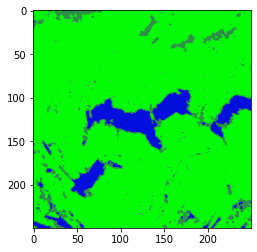

In [7]:

os.chdir(D)
print('Running K Means')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
 
def kMeans(ImageA):
	if ImageA[-3:] != "jpg": return

	image = cv2.imread(ImageA)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	pixel_vals = image.reshape((-1,3))
	pixel_vals = np.float32(pixel_vals)
	criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
	k = 3
	retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
	centers = np.uint8(centers)
	segmented_data = centers[labels.flatten()]
	segmented_image = segmented_data.reshape((image.shape))
	plt.imshow(segmented_image)
	#plt.show()
	x = np.array(segmented_image)
	im = Image.fromarray(x)
	im.save('./Result/'+ImageA)


os.chdir(os.getcwd()+'/getKmean/IMAGE')
L = os.listdir()
for x in L:
	kMeans(x)

In [8]:
#os.system('python ./getKmean/getKmeans.py') # getting K menas of the contours

os.chdir(D+'/getKmean/IMAGE/Result')

L = os.listdir()

for x in L:
	shutil.copy(os.getcwd()+'/'+x, D+'/getRelation/K Means/'+x) # placing K-means in getRelation/K Means
	shutil.copy(os.getcwd()+'/'+x, D+'/getLegend_KMeans/IMAGES/'+x)


In [9]:

os.chdir(D)
print("Running Correlation")

from PIL import Image, ImageOps
import numpy
import os

mainRel = 0
mainNum = 0

def getRelation(x, y):
	global mainRel
	global mainNum

	A = Image.open('./Thresholded Contours/'+x)
	A = ImageOps.grayscale(A)

	B = Image.open('./K Means/'+y)
	B = ImageOps.grayscale(B)

	M = numpy.array(A)
	N = numpy.array(B)

	corCoeff = numpy.corrcoef(M.reshape(M.size),N.reshape(N.size))[0][1]
	mainRel += corCoeff
	mainNum += 1

DIR = os.getcwd()

os.chdir(DIR+'/getRelation/Thresholded Contours')
List1 = os.listdir()

os.chdir(DIR+'/getRelation/K Means')
List2 = os.listdir()

os.chdir(DIR+'/getRelation')

for x in range(len(List1)):
	getRelation(List1[x], List2[x])

print('Correlation Coeff :', mainRel/mainNum)

Running Correlation
Correlation Coeff : 0.04689659952495139


Adding Legends


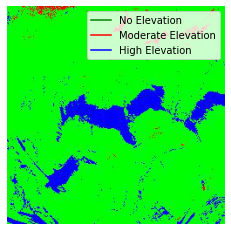

In [10]:
#os.system('python ./getRelation/getRelation.py') # getting Correlation Coeff


print('Adding Legends')
os.chdir(D)
#os.system('python ./getLegend_Thresholded/Legend.py') # adding Legends
import matplotlib.pyplot as plt
import matplotlib.image as imp
import os

def getLegend(Image):
	if Image[-3:] != "jpg": return
	test_image=imp.imread("./"+Image)
	plt.axis('off')
	plt.plot([0], color="green")
	plt.plot([0], color="red")
	plt.plot([0], color="blue")

	plt.legend(["No Elevation", "Moderate Elevation", "High Elevation"], loc ="upper right")

	plt.imshow(test_image)
	plt.savefig('./Result/'+Image)

os.chdir(os.getcwd()+'/getLegend_Thresholded/IMAGES')
L = os.listdir()

for x in L:
	getLegend(x)

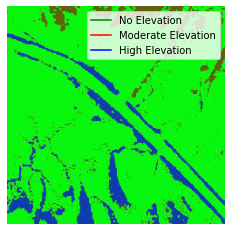

In [11]:

os.chdir(D)
#os.system('python ./getLegend_KMeans/Legend.py') # adding Legends
import matplotlib.pyplot as plt
import matplotlib.image as imp
import os

def getLegend(Image):
	if Image[-3:] != "jpg": return
	test_image=imp.imread("./"+Image)
	plt.axis('off')
	plt.plot([0], color="green")
	plt.plot([0], color="red")
	plt.plot([0], color="blue")

	plt.legend(["No Elevation", "Moderate Elevation", "High Elevation"], loc ="upper right")

	plt.imshow(test_image)
	plt.savefig('./Result/'+Image)

os.chdir(os.getcwd()+'/getLegend_KMeans/IMAGES')
L = os.listdir()

for x in L:
	getLegend(x)

In [ ]:


os.chdir(D) # placing output at OUTPUT folder
print('Creating Output')
os.chdir(D+'/getLegend_Thresholded/IMAGES/Result')
L = os.listdir()
for x in L:
	shutil.copy(os.getcwd()+'/'+x, D+'/OUTPUT/Thresholded/'+x) 
os.chdir(D)
os.chdir(D+'/getLegend_KMeans/IMAGES/Result')
L = os.listdir()
for x in L:
	shutil.copy(os.getcwd()+'/'+x, D+'/OUTPUT/K Means/'+x)
os.chdir(D)
# find the result at OUTPUT folder

Creating Output
